# Assignment 1: Classifying handwritten digits using probability theory

### Goals of the exercise

- To build a simple classifier for MNIST digits using the material on discrete probability theory from lecture #1.

- Get comfortable with discrete probabilities

- Get comfortable with representing images as matrices

To keep things simple, we'll focus on classifying zeros and ones.

### Theory


Assume we have a collection of images of handwritten digits: zeros and ones. Let $\textbf{x}_n \in \mathbb{R}^D$ be a $D$-dimensional vector representation of the $n$'th image and let $y_n \in \left\lbrace 0, 1\right\rbrace$ be the corresponding label indicating whether the image contains a zero or a one. Each of our images consists $28 \times 28$ binary pixels, i.e. a total of $28^2 = 784$ pixels. Thus, each image is represented using a $D = 784$ dimensional vector.

Assume we have a dataset of $N$ such image-label pairs, i.e. $\mathcal{D} = \left\lbrace (\textbf{x}_n, y_n) \right\rbrace_{n=1}^N$

We will use Bayes' theorem to construct a classifier as follows. Let $\textbf{x}^*$ be a new image to be classified, then our goal is to compute the following two probabilities,

$$\mathbb{P}\left(Y = 0| \textbf{X} =\textbf{x}^*\right)\quad\quad\text{and}\quad\quad\mathbb{P}\left(Y = 1 |  \textbf{X} =\textbf{x}^*\right).$$

That is, the probability of the digit being a zero (or one) after seeing the image. 




We can now use Bayes' rule to write the probability of interest as follows:

$$\mathbb{P}\left(Y = 1 |  \textbf{X} =\textbf{x}^*\right) = \frac{\mathbb{P}\left( \textbf{X} =\textbf{x}^*\right|Y = 1)\mathbb{P}\left(Y = 1\right)}{\mathbb{P}\left( \textbf{X} =\textbf{x}^*\right)}.\tag{1}$$

Let $x^*_{1}, x^*_{2}, \dots, x^*_{784}$ denote all the $784$ binary pixel values in the image $\textbf{x}^* = \left[x^*_{1}, x^*_{2}, \dots, x^*_{784}\right]$. Then we can re-write eq. (1) as follows

$$\mathbb{P}\left(Y = 1 |  X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}\right) = \frac{\mathbb{P}\left(  X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}|Y = 1\right)\mathbb{P}\left(Y = 1\right)}{\mathbb{P}\left( X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}\right)}.\tag{2}$$

This equation expresses the probability that the image contains the digit '1' given that the image, $\textbf{x}^*$, consists of the pixel values specificied by $x^*_{1}, x^*_{2}, \dots, x^*_{784}$. 

As we have seen in the lecture, eq. (1) is intractable because we would need to evaluate $2^{784}$ values, so instead we will approximate using a Naı̈ve-Bayes approximation:

$$\mathbb{P}\left(  X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}|Y = 1\right) \approx \prod_{i=1}^{784}\mathbb{P}\left(  X_i = x^*_{i}|Y = 1\right).\tag{3}$$

**Question 1.1: Explain in you own words why this approximation is called "naive"**

To use Bayes' theorem for classification, we need to compute the three components on the right hand side. Let's set  the terminology first:

- The factor $\mathbb{P}\left(Y=1\right)$ is **prior** probability of seeing an image of the digit '1'.  


- The factor $\mathbb{P}\left(  X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}|Y = 1\right)$ is the **likelihood** of seeing the specific combination of pixels given the image contains the digit '1'.


- The denominator $\mathbb{P}\left( X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}\right)$ is the **evidence** or **marginal likelihood**, i.e. the probability of seeing this specific pixel combination across both labels.

Now, we will derive the corresponding approximation for the denominator, i.e. the evidence. We have

$\begin{align}
\mathbb{P}\left( X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}\right) &\stackrel{(a)}{=} \mathbb{P}\left( X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}|Y=1\right)\mathbb{P}(Y=1)\\ &\quad + \mathbb{P}\left( X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}|Y=0\right)\mathbb{P}(Y=0)\\
%
&\stackrel{(b)}{\approx} \prod_{i=1}^{784}\mathbb{P}\left(  X_i = x^*_{i}|Y = 1\right)\mathbb{P}(Y=1) + \prod_{i=1}^{784}\mathbb{P}\left(  X_i = x^*_{i}|Y = 0\right)\mathbb{P}(Y=0)\\
%
&\stackrel{(c)}{=} \mathbb{P}(Y=1)\prod_{i=1}^{784}\mathbb{P}\left(  X_i = x^*_{i}|Y = 1\right) + \mathbb{P}(Y=0)\prod_{i=1}^{784}\mathbb{P}\left(  X_i = x^*_{i}|Y = 0\right). \tag{4}\\
\end{align}$

In the derivation above, we have used the following three properties:

1) The Naı̈ve-Bayes assumption  

2) The law of total probability  

3) The basic multiplication properties of real numbers  


***Question 1.2: In the derivation above, we have used each of the these three properties. Work through the derivation and deduce which property is used in which line. That is, you should match (a), (b), and (c) above with the properties 1), 2) and 3) above. ***



### Loading the data

In [23]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from sklearn.metrics import confusion_matrix

np.random.seed(0)

In [2]:
# load data
data = np.load('mnist_bin.npz')

# get vector representation of binary digits
X = data['X']

# get binary labels
y = data['y']

print('The shape of X is (%d, %d)' % X.shape)
print('The shape of y is (%d)\n' % y.shape)

# Dimensions
N, D = X.shape

print('Number of images: %d' % N)
print('Number of pixels: %d' % D)

The shape of X is (70000, 784)
The shape of y is (70000)

Number of images: 70000
Number of pixels: 784


### Representing images using vectors

An image from the MNIST dataset consists of $28 \times 28$ pixels and is naturally represented as a $28 \times 28$ matrix. This representation makes it easy for us to plot and visualize the image. However, in signal processing and machine learning, it is usually more convinient to represent data as vectors rather than matrices. This makes it possible for us to use the tools from our machine learning toolbox on many different types of data. Therefore, we use a vector representation for the images in this notebook. 

To go from the matrix representation to the vector representation, we basically take all the $28$ columns in the image matrix and stack them on top of each other. The result is a $28^2 = 784$ dimensional vector. Similarly, if we want to go from the image vector representation to the image matrix representation, we take the $784$ dimensional vector and divide it into $28$ smaller $28$ dimensional vectors and stack them side by side to form a $28 \times 28$ matrix.

As shown above, the matrix $\mathbf{X}$ is matrix with $70.000$ rows and $784$ columns. Each row corresponds to a separate image and each column corresponds to a specific pixel. That is, $X_{i,j}$, refers to the $j$'th pixel in the $i$'th image and each image is a now vector in $\mathbb{R}^{784}$.

The function show_image will take a $784$-dimensional vector and reshape it into a $28\times28$ matrix before plotting it.

In [3]:
def show_image(x, title="", clim=None, cmap=plt.cm.gray, colorbar=False):
    ax = plt.gca()
    im = ax.imshow(x.reshape((28, 28)), cmap=cmap, clim=clim)
    
    if len(title) > 0:
        plt.title(title)
        
    plt.axis('off')
    
    if colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

### Let's inspect some numbers

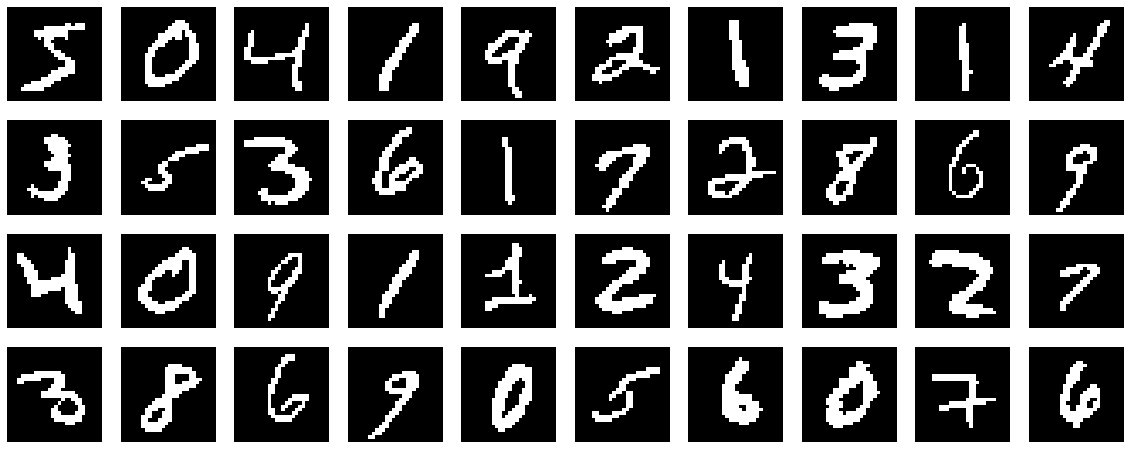

In [39]:
num_images_per_row = 10
num_rows = 4
num_images = num_images_per_row * num_rows

plt.figure(figsize=(20, 8))
for i in range(num_images):
    plt.subplot(num_rows, num_images_per_row, 1 + i)
    show_image(X[i, :])

### Another way to visualize a binary digit: a matrix

In [5]:
print(X[0].reshape((28, 28)).astype('int'))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 

### Split into training and test

Now we will split our data into a training and a test set.

In [6]:
N = len(X)
N_train = int(0.1*N)
N_test = N - N_train

# create a random permutation for splitting into training and test
randperm = np.random.permutation(N)

# split into training and test
train_idx = randperm[:N_train]
test_idx = randperm[N_train:]
Xtrain, Xtest = X[train_idx, :], X[test_idx, :]
ytrain, ytest = y[train_idx], y[test_idx]

print('Total number of images:\t\t%d' % N)
print('Number of training images:\t%d' % N_train)
print('Number of test images:\t\t%d' % N_test)

Total number of images:		70000
Number of training images:	7000
Number of test images:		63000


### Fitting the Naı̈ve-Bayes model to training set: the prior

We are now ready to estimate the probabilities from our training set. First, we will estimate the prior probabilities, $\mathbb{P}(Y=0)$ and $\mathbb{P}(Y=1)$:

In [7]:
# count the number of numbers
counts = [sum(ytrain == i) for i in range(10)]

# compute prior prob.: P(Y=0) = count_zeros/N_train and P(Y=1) = count_ones/N_train
probs = [count / N_train for count in counts]

# let's store both probabilities in a vector
priors = probs

print(f'Number of training digits:\t{N_train}')
for i in range(10):
    print(f'Number of {i}\t\t\t {counts[i]}')
print('')
for i in range(10):
    print(f'Prior probability of seeing a {i}:\tp(Y = {i})  = {counts[i]}/{N_train} = {round(probs[i], 2)}')

Number of training digits:	7000
Number of 0			 705
Number of 1			 815
Number of 2			 707
Number of 3			 684
Number of 4			 661
Number of 5			 605
Number of 6			 674
Number of 7			 760
Number of 8			 693
Number of 9			 696

Prior probability of seeing a 0:	p(Y = 0)  = 705/7000 = 0.1
Prior probability of seeing a 1:	p(Y = 1)  = 815/7000 = 0.12
Prior probability of seeing a 2:	p(Y = 2)  = 707/7000 = 0.1
Prior probability of seeing a 3:	p(Y = 3)  = 684/7000 = 0.1
Prior probability of seeing a 4:	p(Y = 4)  = 661/7000 = 0.09
Prior probability of seeing a 5:	p(Y = 5)  = 605/7000 = 0.09
Prior probability of seeing a 6:	p(Y = 6)  = 674/7000 = 0.1
Prior probability of seeing a 7:	p(Y = 7)  = 760/7000 = 0.11
Prior probability of seeing a 8:	p(Y = 8)  = 693/7000 = 0.1
Prior probability of seeing a 9:	p(Y = 9)  = 696/7000 = 0.1


### Fitting the Naı̈ve-Bayes model to training set: the likelihood

Next, we will compute the likelihood probabilities required for Naı̈ve-Bayes for classification using our training set. We need to estimate the probabilities $\mathbb{P}\left(  X_i = x^*_{i}|Y = 1\right)$ and $\mathbb{P}\left(  X_i = x^*_{i}|Y = 0\right)$ for $i = 1, \dots, 784$ as shown in eq. (3) above. 

Because the images are binary, for each pixel we only need to estimate the probability $\mathbb{P}\left(  X_i = 1|Y = 1\right)$ and then we can calculate the probability of the complement as follows

$$\mathbb{P}\left(  X_i = 0|Y = 1\right) = 1 - \mathbb{P}\left(  X_i = 1|Y = 1\right)$$


Let's do the calculations! First, we will split our training data into numbers:



In [8]:
Xtrains = [Xtrain[ytrain == i, :] for i in range(10)]

and then we will estimate the probabilities for all pixels at once using the following two lines of code:

In [9]:
# fit model for zeros and ones separately
ps = [np.mean(Xtrains[i], axis=0) for i in range(10)]

Now the array p_zeros contains all the probabilities $\mathbb{P}\left(  X_i = 1|Y = 0\right)$ such that p_zeros[0] = $\mathbb{P}\left(  X_1 = 1|Y = 0\right)$, p_zeros[1] = $\mathbb{P}\left(  X_2 = 1|Y = 0\right)$  etc. and similar for the array p_ones.

***Question 2.1: Explain what happens in the two lines above and why it is equivalent to estimating the probabilities $\mathbb{P}\left(  X_i = 1|Y = 0\right)$ and $\mathbb{P}\left(X_i = 1|Y = 1\right)$***

### Visualizing the probabilities

Let's plot the estimated probability for each pixel for each of the two digits.

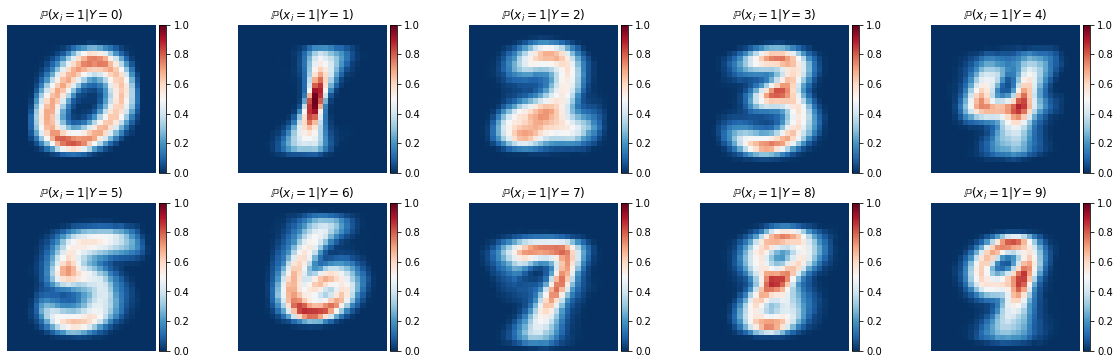

In [10]:
## visualize models
plt.figure(figsize=(20, 6))

for i in range(10):
    plt.subplot(2,5,i+1)
    show_image(ps[i], title='$\mathbb{P}'+f'(x_i = 1|Y={i})$', clim=(0, 1), colorbar=True, cmap=plt.cm.RdBu_r)

The image on the left shows the probabilities $\mathbb{P}(x_i = 1|Y=0)$ for each pixel. Dark red corresponds to a probability clsoe to 1, dark blue corresponds to a probability clsoe to 0, while white corresponds to a probability of 0.5.

***Question 2.2: Explain in your own words what you are seeing on the two figures. How do the figures relate to the equations?***

***Question 2.3: Why is the model for the digit-1 almost shaped like an X?***

Hint: Look at the training images above


### Let's classify a few training images

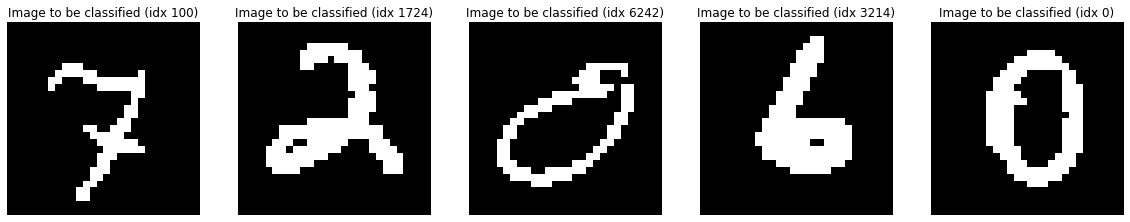

In [11]:
image_idxs_to_be_classified = [100, 1724, 6242, 3214, 0]

plt.figure(figsize=(20, 4))
for plot_idx, image_idx in enumerate(image_idxs_to_be_classified):
    plt.subplot(1, 5, 1 + plot_idx)
    show_image(Xtrain[image_idx], title='Image to be classified (idx %d)' % image_idx)

The following function compute the likelihood of the image based on the vector of probabilities: p_digit. This means computing the product in eq. (3) above. However, the since probabilities are number between 0 and 1, the product of 784 probabilities can result in a very small number that causes numeric underflow. Therefore, for numeric stability, we will carry out the computations in the logaritmic domain.

In [12]:
def log_likelihood(x_new, p_digit):
    pixel_log_lik = x_new*np.log(p_digit + 1e-16) + (1-x_new)*np.log(1-p_digit)
    return np.sum(pixel_log_lik)


for image_idx in image_idxs_to_be_classified:
    x_new = Xtrain[image_idx]
    print('Image idx: %d' % image_idx)
    for i in range(10):
        print(f'p(x_new | Y={i}): {round(np.exp(log_likelihood(x_new, ps[i])), 2)}' )
    print('\n')

Image idx: 100
p(x_new | Y=0): 0.0
p(x_new | Y=1): 0.0
p(x_new | Y=2): 0.0
p(x_new | Y=3): 0.0
p(x_new | Y=4): 0.0
p(x_new | Y=5): 0.0
p(x_new | Y=6): 0.0
p(x_new | Y=7): 0.0
p(x_new | Y=8): 0.0
p(x_new | Y=9): 0.0


Image idx: 1724
p(x_new | Y=0): 0.0
p(x_new | Y=1): 0.0
p(x_new | Y=2): 0.0
p(x_new | Y=3): 0.0
p(x_new | Y=4): 0.0
p(x_new | Y=5): 0.0
p(x_new | Y=6): 0.0
p(x_new | Y=7): 0.0
p(x_new | Y=8): 0.0
p(x_new | Y=9): 0.0


Image idx: 6242
p(x_new | Y=0): 0.0
p(x_new | Y=1): 0.0
p(x_new | Y=2): 0.0
p(x_new | Y=3): 0.0
p(x_new | Y=4): 0.0
p(x_new | Y=5): 0.0
p(x_new | Y=6): 0.0
p(x_new | Y=7): 0.0
p(x_new | Y=8): 0.0
p(x_new | Y=9): 0.0


Image idx: 3214
p(x_new | Y=0): 0.0
p(x_new | Y=1): 0.0
p(x_new | Y=2): 0.0
p(x_new | Y=3): 0.0
p(x_new | Y=4): 0.0
p(x_new | Y=5): 0.0
p(x_new | Y=6): 0.0
p(x_new | Y=7): 0.0
p(x_new | Y=8): 0.0
p(x_new | Y=9): 0.0


Image idx: 0
p(x_new | Y=0): 0.0
p(x_new | Y=1): 0.0
p(x_new | Y=2): 0.0
p(x_new | Y=3): 0.0
p(x_new | Y=4): 0.0
p(x_new | Y=5): 

### Implementing Bayes's theorem

The function below computes and returns the two probabilities: $\mathbb{P}(Y=0|\mathbf{x}^*)$ and $\mathbb{P}(Y=1|\mathbf{x}^*)$

In [13]:
def compute_posterior_prob(x_new):
    
    # compute log likelihood
    log_liks = [log_likelihood(x_new, ps[i]) for i in range(10)]
    # exponentiate
    liks = [np.exp(log_liks[i]) for i in range(10)]
    # implement eq. (4)
    terms = [liks[i]*priors[i] for i in range(10)]

    evidence = sum(terms)
    
    # implements eq. (1)
    post_probs = [terms[i]/evidence for i in range(10)]
    # return P(Y=0|x) and P(Y=1|x)
    return post_probs

for image_idx in image_idxs_to_be_classified:
    x_new = Xtrain[image_idx]

    print('Image idx: %d' % image_idx)
    for i in range(10):
        print(f'p(Y={i} | x_new): {round(compute_posterior_prob(x_new)[i], 3)}') 
    print('')

Image idx: 100
p(Y=0 | x_new): 0.0
p(Y=1 | x_new): 0.0
p(Y=2 | x_new): 0.0
p(Y=3 | x_new): 0.0
p(Y=4 | x_new): 0.0
p(Y=5 | x_new): 0.0
p(Y=6 | x_new): 0.0
p(Y=7 | x_new): 1.0
p(Y=8 | x_new): 0.0
p(Y=9 | x_new): 0.0

Image idx: 1724
p(Y=0 | x_new): 0.0
p(Y=1 | x_new): 0.0
p(Y=2 | x_new): 1.0
p(Y=3 | x_new): 0.0
p(Y=4 | x_new): 0.0
p(Y=5 | x_new): 0.0
p(Y=6 | x_new): 0.0
p(Y=7 | x_new): 0.0
p(Y=8 | x_new): 0.0
p(Y=9 | x_new): 0.0

Image idx: 6242
p(Y=0 | x_new): 1.0
p(Y=1 | x_new): 0.0
p(Y=2 | x_new): 0.0
p(Y=3 | x_new): 0.0
p(Y=4 | x_new): 0.0
p(Y=5 | x_new): 0.0
p(Y=6 | x_new): 0.0
p(Y=7 | x_new): 0.0
p(Y=8 | x_new): 0.0
p(Y=9 | x_new): 0.0

Image idx: 3214
p(Y=0 | x_new): 0.0
p(Y=1 | x_new): 0.0
p(Y=2 | x_new): 0.0
p(Y=3 | x_new): 0.0
p(Y=4 | x_new): 0.0
p(Y=5 | x_new): 0.0
p(Y=6 | x_new): 1.0
p(Y=7 | x_new): 0.0
p(Y=8 | x_new): 0.0
p(Y=9 | x_new): 0.0

Image idx: 0
p(Y=0 | x_new): 1.0
p(Y=1 | x_new): 0.0
p(Y=2 | x_new): 0.0
p(Y=3 | x_new): 0.0
p(Y=4 | x_new): 0.0
p(Y=5 | x_new): 0.0


In [14]:
image_idxs_to_be_classified

[100, 1724, 6242, 3214, 0]

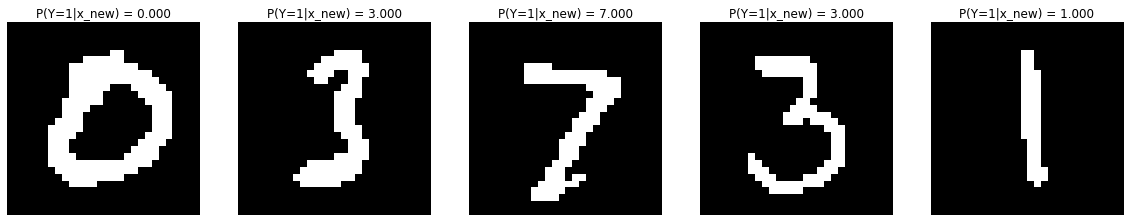

In [16]:
plt.figure(figsize=(20, 4))
for plot_idx, image_idx in enumerate([np.random.randint(7000) for _ in range(5)]):
    plt.subplot(1, 5, 1 + plot_idx)
    x_new = Xtrain[image_idx]
    p1 = np.argmax(compute_posterior_prob(x_new))
    show_image(Xtrain[image_idx], title='P(Y=1|x_new) = %4.3f' % p1)

### A simple classification rule

We will use the following simple classification rule: 

If $\mathbb{P}\left(Y = 1 |  \textbf{X} =\textbf{x}^*\right) > 0.5$, then we classify $\textbf{x}^*$ as a one, and otherwise a zero.


In [17]:
def classify(x):
    p = compute_posterior_prob(x)
    predicted_label = np.argmax(p)
    return predicted_label

### Let's test it on a bunch of digits

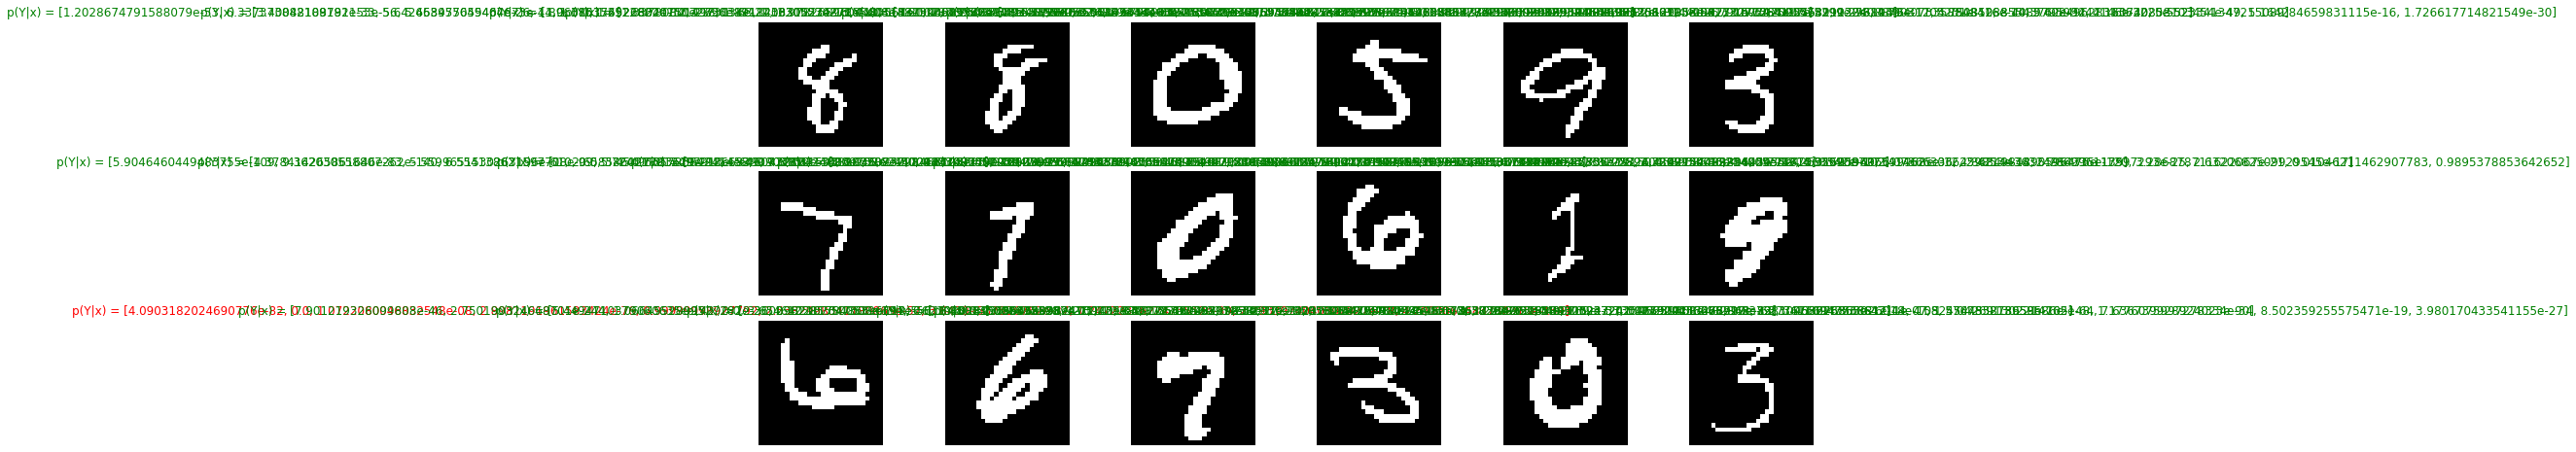

In [18]:
plt.figure(figsize=(20, 8))
for i in range(num_images):
    plt.subplot(num_rows, num_images_per_row, 1 + i)
    
    # compute posterior probabilities
    p = compute_posterior_prob(Xtest[i, :])
    
    # get true label and predicted label
    true_label = ytest[i]
    predicted_label = classify(Xtest[i, :])
    
    # show image 
    show_image(Xtest[i, :])
    
    # if the classification is correct, use green otherwise use red 
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.title(f'p(Y|x) = {p}', color=color)

### Let's compute the training and test errors

In [19]:
ytrain_hat = np.array([classify(x) for x in Xtrain])
ytest_hat = np.array([classify(x) for x in Xtest])

In [20]:
mean_train_acc = np.mean(ytrain_hat == ytrain)
mean_test_acc = np.mean(ytest_hat == ytest)
print('Training accuracy:\t%4.3f' % mean_train_acc)
print('Test accuracy:\t\t%4.3f' % mean_test_acc)

Training accuracy:	0.850
Test accuracy:		0.839


## Confusion matrix

In [43]:
print(ytest)
print(len(ytest))
print(ytest_hat)
print(Xtest)
print(len(Xtest))

[8 8 0 ... 7 1 1]
63000
[8 8 0 ... 7 1 8]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
63000


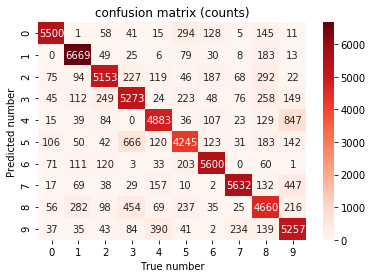

In [52]:
# matrix currently uses wrong data (i think)
CM = confusion_matrix(ytest, ytest_hat)
xticklabels = [str(i) for i in range(10)]
sns.heatmap(CM, xticklabels=xticklabels, yticklabels=xticklabels, annot=True, cmap="Reds", fmt = 'd')
plt.title('confusion matrix (counts)')
plt.xlabel('True number')
plt.ylabel('Predicted number')
plt.show()

In [51]:
xticklabels = [str(i) for i in range(10)]

In [ ]:
b

In [ ]:
b